In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
df1=pd.read_csv('/content/Random_Imputer.csv',usecols=['Age','Fare','Survived'])
df2=pd.read_csv('/content/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [7]:
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df1.isna().sum()

,0
Survived,0
Age,177
Fare,0


In [11]:
X=df1.drop(columns=['Survived'])
y=df1['Survived']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [19]:
X_train['Imputed_Age']=X_train['Age']
X_test['Imputed_Age']=X_test['Age']

In [20]:
X_train['Imputed_Age'][X_train['Imputed_Age'].isnull()]

,Imputed_Age
77,NaN
868,NaN
334,NaN
295,NaN
792,NaN
...,...
674,NaN
466,NaN
584,NaN
527,NaN


In [23]:
X_train['Age'].dropna().sample(X_train['Age'].isna().sum()).values

array([ 7.  , 50.  , 27.  , 22.  , 34.  , 65.  , 45.  , 33.  , 16.  ,
       35.  , 45.  , 28.  , 21.  , 20.  , 42.  , 22.  , 40.  , 35.  ,
        4.  , 58.  , 40.  , 41.  , 21.  , 18.  ,  3.  , 16.  , 18.  ,
       24.  , 22.  , 52.  , 32.  , 33.  ,  2.  , 25.  , 54.  , 35.  ,
        9.  , 39.  , 63.  ,  2.  , 34.  , 19.  , 26.  , 26.  , 43.  ,
       34.  , 34.5 , 17.  , 21.  , 44.  , 26.  , 48.  , 56.  , 51.  ,
       39.  , 30.  , 49.  , 34.  , 27.  , 60.  , 21.  , 19.  , 20.  ,
       16.  , 23.  ,  0.75, 32.  , 36.  , 18.  , 47.  , 24.  , 14.  ,
       38.  ,  0.67, 24.  , 22.  , 39.  , 28.  , 47.  ,  1.  , 40.5 ,
       39.  , 24.  , 43.  , 64.  , 19.  , 47.  , 16.  , 24.  , 20.  ,
       28.  , 14.  , 24.  , 31.  , 14.  , 43.  , 22.  , 34.  , 70.  ,
       58.  , 28.  , 40.  , 31.  , 16.  , 19.  , 58.  , 24.  , 16.  ,
       22.  , 22.  , 21.  , 56.  , 37.  ,  1.  , 18.  , 47.  , 60.  ,
       26.  , 41.  ,  6.  , 23.5 , 23.  , 31.  , 30.  , 36.  , 18.  ,
       27.  ,  1.  ,

In [24]:
X_train['Imputed_Age'][X_train['Imputed_Age'].isna()]=X_train['Age'].dropna().sample(X_train['Age'].isna().sum()).values
X_test['Imputed_Age'][X_test['Imputed_Age'].isna()]=X_test['Age'].dropna().sample(X_test['Age'].isna().sum()).values

/tmp/ipython-input-2797278454.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Imputed_Age'][X_train['Imputed_Age'].isna()]=X_train['Age'].dropna().sample(X_train['Age'].isna().sum()).values
/tmp/ipython-input-2797278454.py:2: Fu

In [25]:
X_train

,Age,Fare,Imputed_Age
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,14.0
493,71.0,49.5042,71.0
527,NaN,221.7792,21.0


/tmp/ipython-input-1395768191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
/tmp/ipython-input-1395768191.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Imputed_Age'],label = 'Imputed',hist=False)


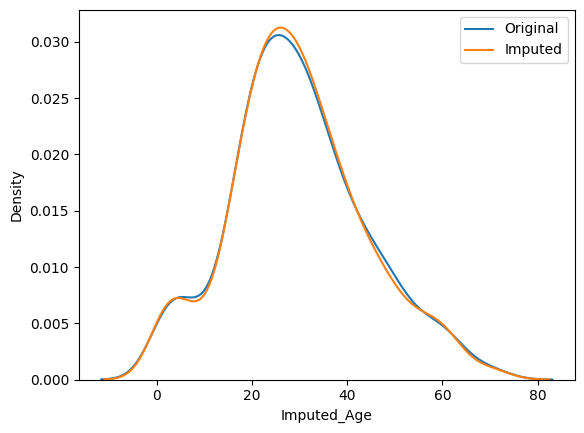

In [28]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Imputed_Age'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [30]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Imputed_Age'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  200.79436465415083


In [32]:
X_train[['Fare', 'Age', 'Imputed_Age']].cov()

,Fare,Age,Imputed_Age
Fare,2368.246832,71.512440,57.380740
Age,71.512440,204.349513,204.349513
Imputed_Age,57.380740,204.349513,200.794365


<Axes: >

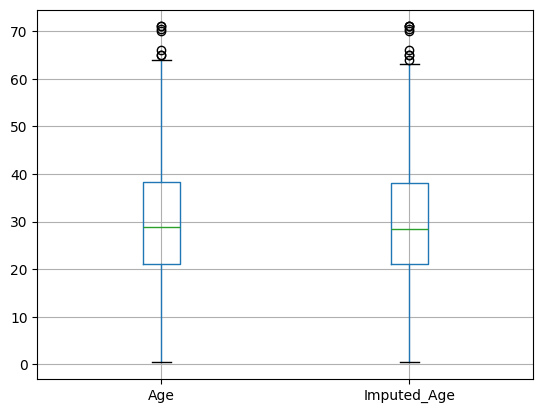

In [33]:
X_train[['Age', 'Imputed_Age']].boxplot()

In [38]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

TypeError: only length-1 arrays can be converted to Python scalars

In [39]:
df2.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [40]:
df2.isnull().mean() * 100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [41]:
X = df2
y = df2['SalePrice']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']


In [45]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
791,TA,TA,146800,TA,TA
12,NaN,TA,144000,TA,NaN
537,NaN,TA,111250,TA,NaN
371,Gd,TA,134432,TA,Gd
1087,Gd,TA,252000,TA,Gd


In [46]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/tmp/ipython-input-856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
/tmp/

In [47]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [48]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [50]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df2)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.398630
TA,0.412439,0.326712
Fa,0.040917,0.032877
Po,0.027823,0.022603
Ex,0.024550,0.019178


/tmp/ipython-input-1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']

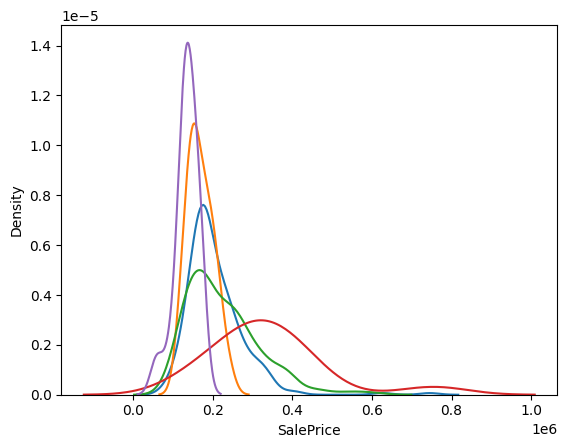

In [51]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/tmp/ipython-input-722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firepla

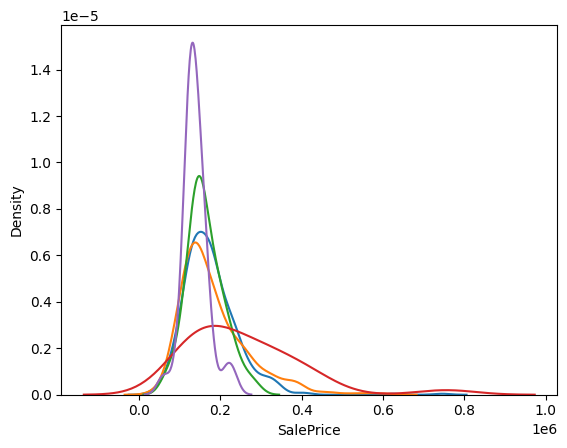

In [52]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()